<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer following questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [14]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [17]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5106 - accuracy: 0.7965 - val_loss: 0.3936 - val_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3070 - accuracy: 0.9040 - val_loss: 0.3102 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2272 - accuracy: 0.9283 - val_loss: 0.3275 - val_accuracy: 0.8647
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1803 - accuracy: 0.9418 - val_loss: 0.2838 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1490 - accuracy: 0.9535 - val_loss: 0.3011 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1217 - accuracy: 0.9632 - val_loss: 0.3023 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1030 - accuracy: 0.9693 - val_loss: 0.3138 - val_accuracy: 0.8819
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [22]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [23]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.4969 - accuracy: 0.7817 - val_loss: 0.3658 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2863 - accuracy: 0.9045 - val_loss: 0.2920 - val_accuracy: 0.8907
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2049 - accuracy: 0.9335 - val_loss: 0.2856 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1630 - accuracy: 0.9471 - val_loss: 0.2831 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1327 - accuracy: 0.9574 - val_loss: 0.2843 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1045 - accuracy: 0.9680 - val_loss: 0.3041 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0879 - accuracy: 0.9741 - val_loss: 0.3211 - val_accuracy: 0.8843
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

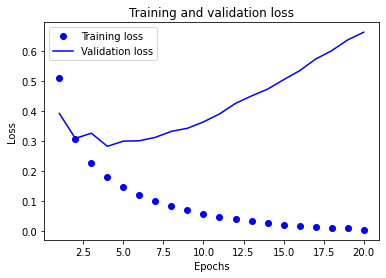

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [33]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_dr = model2_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6529 - accuracy: 0.6015 - val_loss: 0.5483 - val_accuracy: 0.8285
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5435 - accuracy: 0.7304 - val_loss: 0.4304 - val_accuracy: 0.8525
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4683 - accuracy: 0.7941 - val_loss: 0.3459 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3949 - accuracy: 0.8402 - val_loss: 0.3107 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3340 - accuracy: 0.8747 - val_loss: 0.2921 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2910 - accuracy: 0.8943 - val_loss: 0.2879 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2471 - accuracy: 0.9115 - val_loss: 0.2794 - val_accuracy: 0.8872
Epoch 8/20
30

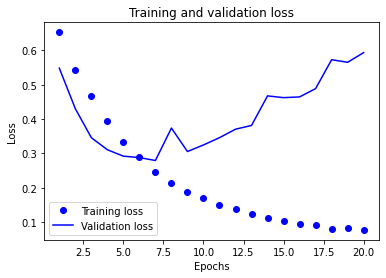

In [34]:
import matplotlib.pyplot as plt
history2_dr_dict = history2_dr.history
loss_values = history2_dr_dict["loss"]
val_loss_values = history2_dr_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [40]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers
model2_dr_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.003), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [41]:
model2_dr_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_dr_l1 = model2_dr_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5615 - accuracy: 0.7888 - val_loss: 0.4319 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3569 - accuracy: 0.8991 - val_loss: 0.3763 - val_accuracy: 0.8656
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2729 - accuracy: 0.9243 - val_loss: 0.3255 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2225 - accuracy: 0.9426 - val_loss: 0.3197 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1847 - accuracy: 0.9567 - val_loss: 0.3294 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1614 - accuracy: 0.9612 - val_loss: 0.3337 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1389 - accuracy: 0.9693 - val_loss: 0.3503 - val_accuracy: 0.8856
Epoch 8/20
30